In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from yellowbrick.regressor import ResidualsPlot, PredictionError


pd.options.display.float_format = '{:,.3f}'.format

%matplotlib inline

In [12]:
data = pd.read_csv('winequality_clean.csv')

# Criando Variável dummy para indicar o tipo de vinho
data['cal_tinto'] = data.eval('type == "Red"') * 1

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
target = 'quality'
features = ['fixed acidity',        'volatile acidity', 'citric acid',
            'residual sugar',       'chlorides',        'free sulfur dioxide',
            'total sulfur dioxide', 'density',          'pH', 
            'sulphates',            'alcohol',          'cal_tinto']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

### Modelagem

Como verificamos na parte de exploração de dados, não temos todos os scores de 0 a 10 e portanto não é possível utilizar um modelo de classificação para resolver o problema.

Utilizaremos portanto técnicas de regressão, como regressão linear, Ridge e Árvores de regressão

### Regressão Linear Múltipla

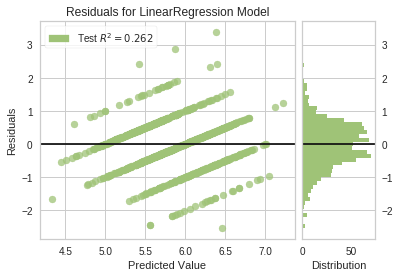

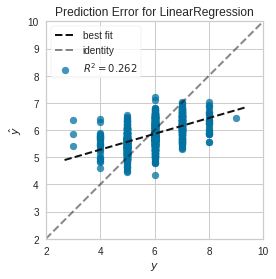

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

vis = ResidualsPlot(lr)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(lr)

vis.score(X_test, y_test)
vis.poof() 

### Regressão de Ridge

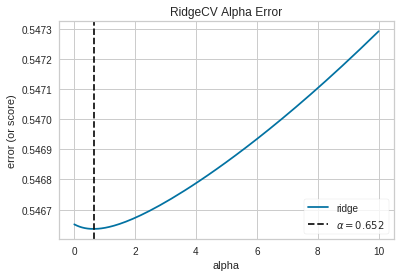

In [41]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 400)


ridge = RidgeCV(alphas=alphas, store_cv_values=True)

vis = AlphaSelection(ridge)

vis.fit(X_train, y_train)
g = vis.poof()

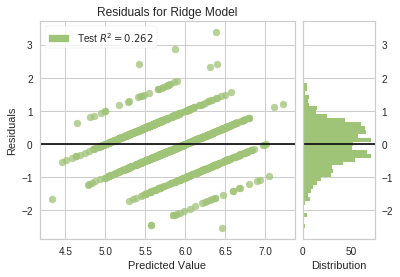

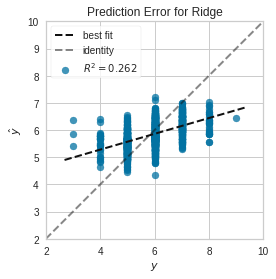

In [46]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = .65)
ridge.fit(X_train, y_train)

vis = ResidualsPlot(ridge)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(ridge)

vis.score(X_test, y_test)
vis.poof() 

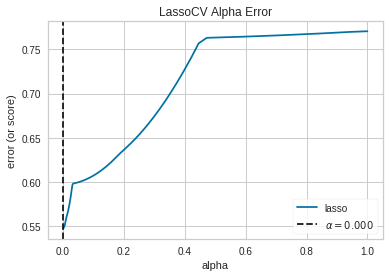

In [45]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-10, 0, 400)


lasso = LassoCV(alphas=alphas, cv=5)

vis = AlphaSelection(lasso)

vis.fit(X_train, y_train)
g = vis.poof()

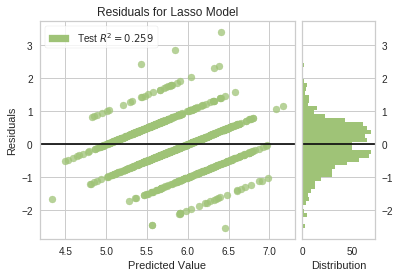

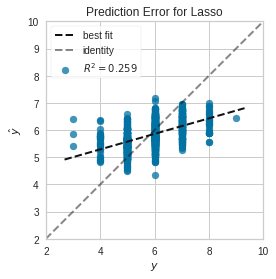

In [54]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

vis = ResidualsPlot(lasso)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(lasso)

vis.score(X_test, y_test)
vis.poof()

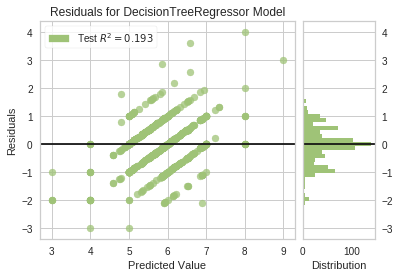

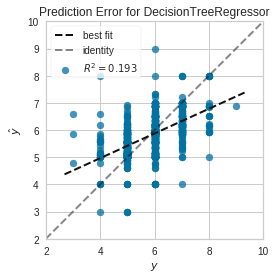

In [68]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10)


dt.fit(X_train, y_train)

vis = ResidualsPlot(dt)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(dt)

vis.score(X_test, y_test)
vis.poof()

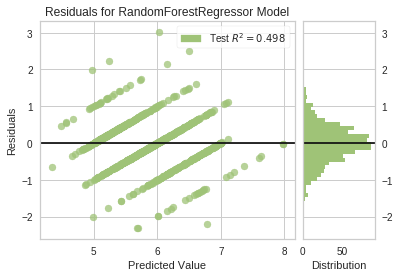

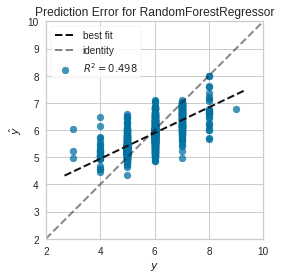

In [112]:
from sklearn.ensemble import RandomForestRegressor

dt = RandomForestRegressor(max_depth=15, n_estimators=100)


dt.fit(X_train, y_train)

vis = ResidualsPlot(dt)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(dt)

vis.score(X_test, y_test)
vis.poof()

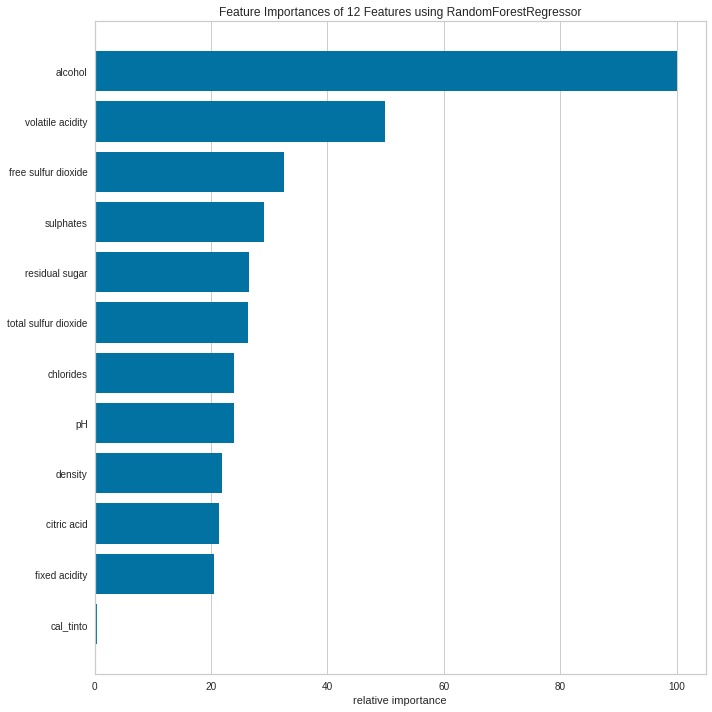

In [114]:
from yellowbrick.features.importances import FeatureImportances

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

viz = FeatureImportances(dt, ax=ax)
viz.fit(X, y)
viz.poof()

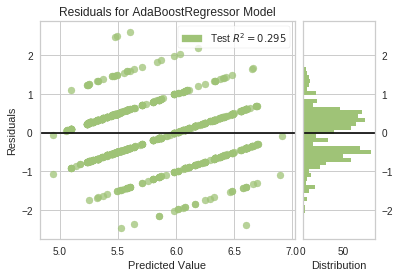

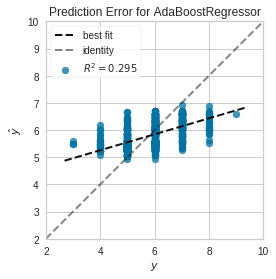

In [74]:
from sklearn.ensemble import AdaBoostRegressor

dt = AdaBoostRegressor(n_estimators=100)


dt.fit(X_train, y_train)

vis = ResidualsPlot(dt)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(dt)

vis.score(X_test, y_test)
vis.poof()

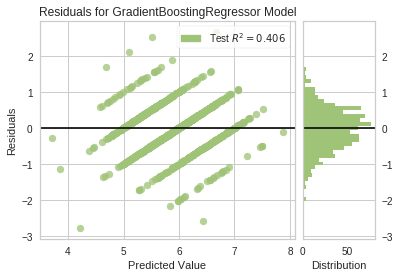

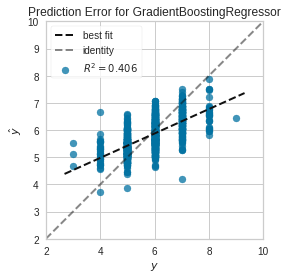

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

dt = GradientBoostingRegressor(n_estimators=100 , learning_rate=0.3, max_depth=10, max_leaf_nodes=10, loss='ls')


dt.fit(X_train, y_train)

vis = ResidualsPlot(dt)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(dt)

vis.score(X_test, y_test)
vis.poof()

### Modelagem Apartada

Como vimos na exploração dos dados, existem evidências que as variáveis influenciam os tipos de vinhos de maneira diferente, portanto, vamos testar modelar os tipos de finhos separadamente, começando pelo Tinto

In [86]:
white_data = data.query("type == 'White'").select_dtypes(include = ['float64', 'int64']).copy()
red_data = data.query("type == 'Red'").select_dtypes(include = ['float64', 'int64']).copy()

In [88]:
# Interações entre variáveis que se destacaram na exploração

red_data['free x total sulfur_dioxide'] = ((
    (red_data['free sulfur dioxide'] - np.mean(red_data['free sulfur dioxide']))/np.std(red_data['free sulfur dioxide']))
  * (red_data['total sulfur dioxide'] - np.mean(red_data['total sulfur dioxide']))/np.std(red_data['total sulfur dioxide']))

In [90]:
red_data['residual sugar x free sulfur_dioxide'] = ((
    (red_data['free sulfur dioxide'] - np.mean(red_data['free sulfur dioxide']))/np.std(red_data['free sulfur dioxide']))
  * (red_data['residual sugar'] - np.mean(red_data['residual sugar']))/np.std(red_data['residual sugar']))

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'cal_tinto',
       'free x total sulfur_dioxide', 'residual sugar x free sulfur_dioxide'],
      dtype='object')

In [93]:
Xr = red_data[[col for col in red_data.columns if col !=target]]
yr = red_data[target]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size = 0.15)

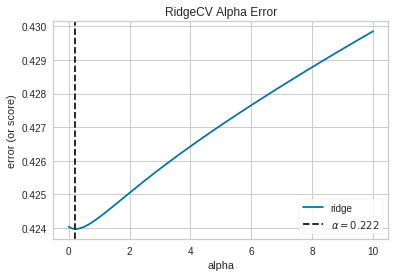

In [94]:
alphas = np.logspace(-10, 1, 400)

ridge = RidgeCV(alphas=alphas, store_cv_values=True)

vis = AlphaSelection(ridge)

vis.fit(Xr_train, yr_train)
g = vis.poof()

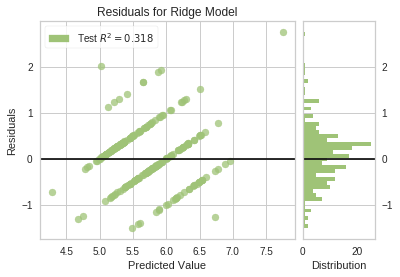

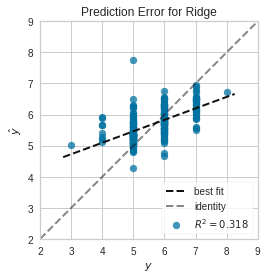

In [97]:
ridge = Ridge(alpha = .22)
ridge.fit(Xr_train, yr_train)

vis = ResidualsPlot(ridge)

vis.score(Xr_test, yr_test)
vis.poof()

vis = PredictionError(ridge)

vis.score(Xr_test, yr_test)
vis.poof() 

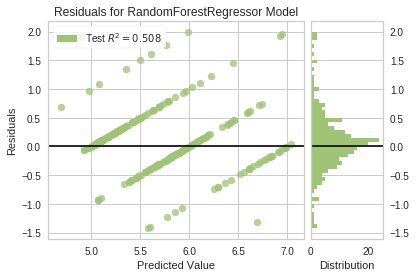

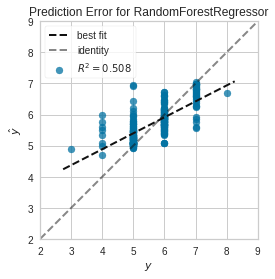

In [98]:
dt = RandomForestRegressor(max_depth=15, n_estimators=100)

dt.fit(Xr_train, yr_train)

vis = ResidualsPlot(dt)

vis.score(Xr_test, yr_test)
vis.poof()

vis = PredictionError(dt)

vis.score(Xr_test, yr_test)
vis.poof()

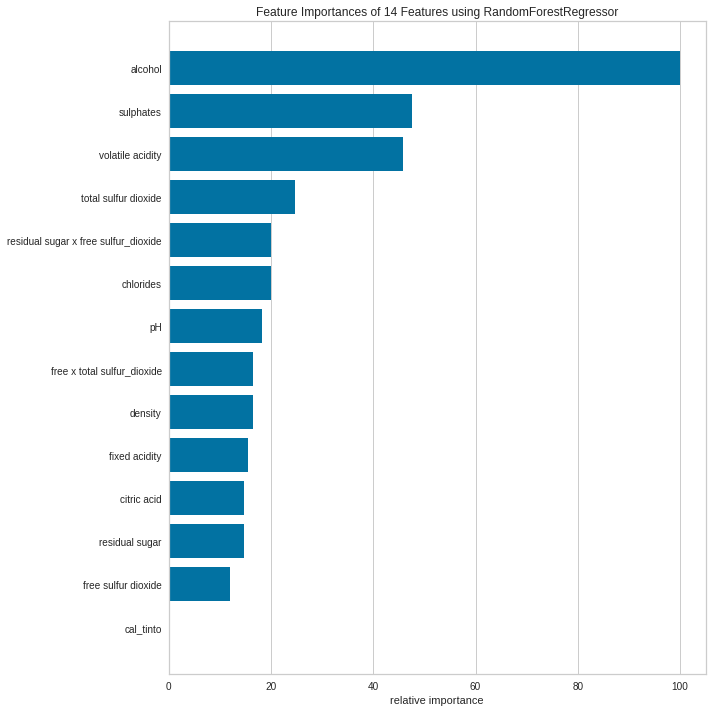

In [100]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

viz = FeatureImportances(dt, ax=ax)
viz.fit(Xr, yr)
viz.poof()

Conseguimos um valor de $R^2$ razoável (.5). Analisando a importância das variáveis, podemos notar que o teor alcóolico é de grande inportância para o escore do vinho tinto, seguido pela concentração de sulfatos

### Vinho Branco

In [102]:
white_data['free x total sulfur_dioxide'] = ((
    (white_data['free sulfur dioxide'] - np.mean(white_data['free sulfur dioxide']))/np.std(white_data['free sulfur dioxide']))
  * (white_data['total sulfur dioxide'] - np.mean(white_data['total sulfur dioxide']))/np.std(white_data['total sulfur dioxide']))

In [103]:
white_data['residual sugar x free sulfur_dioxide'] = ((
    (white_data['free sulfur dioxide'] - np.mean(white_data['free sulfur dioxide']))/np.std(white_data['free sulfur dioxide']))
  * (white_data['residual sugar'] - np.mean(white_data['residual sugar']))/np.std(white_data['residual sugar']))

In [104]:
Xw = white_data[[col for col in white_data.columns if col !=target]]
yw = white_data[target]

Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size = 0.15)

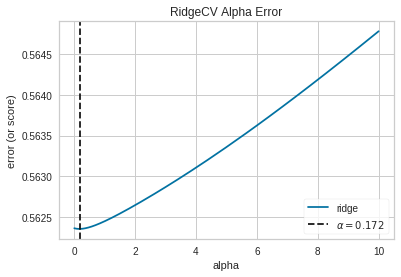

In [106]:
alphas = np.logspace(-10, 1, 400)

ridge = RidgeCV(alphas=alphas, store_cv_values=True)

vis = AlphaSelection(ridge)

vis.fit(Xw_train, yw_train)
g = vis.poof()

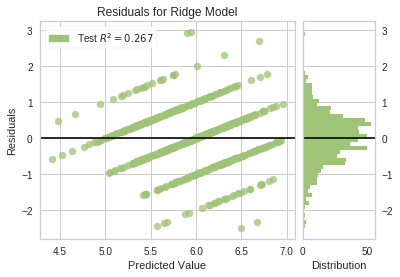

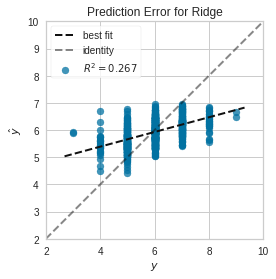

In [107]:
ridge = Ridge(alpha = .17)
ridge.fit(Xw_train, yw_train)

vis = ResidualsPlot(ridge)

vis.score(Xw_test, yw_test)
vis.poof()

vis = PredictionError(ridge)

vis.score(Xw_test, yw_test)
vis.poof()

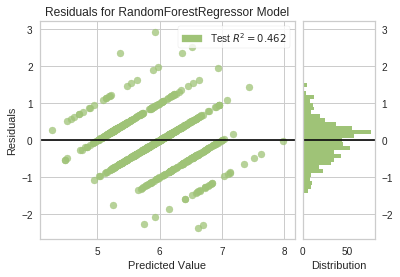

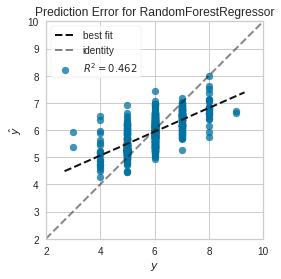

In [110]:
dt = RandomForestRegressor(max_depth=12, n_estimators=100)

dt.fit(Xw_train, yw_train)

vis = ResidualsPlot(dt)

vis.score(Xw_test, yw_test)
vis.poof()

vis = PredictionError(dt)

vis.score(Xw_test, yw_test)
vis.poof()

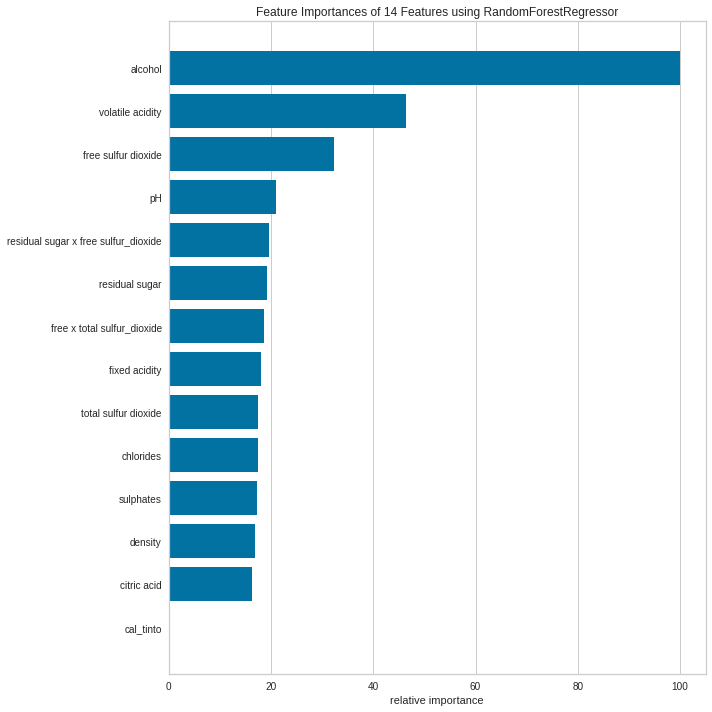

In [111]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

viz = FeatureImportances(dt, ax=ax)
viz.fit(Xw, yw)
viz.poof()

Conseguimos um valor de $R^2$ razoável (.46). Analisando a importância das variáveis, podemos notar que o teor alcóolico é de grande inportância para o escore do vinho branco, seguido pela volatilidade da Acidez

## Conclusão

Conseguimos criar modelos razoáveis de regressão par explicar o escore dos vinhos. 

O Modelo com a melhor generalização, foi o de Floresta Aleatória, mantendo $r^2$ próximo a .5 na validação.

Analisando a importância das variáveis dos três modelos, podemos ver que o teor alcóolico é de principal importância, seguid do variáveis diferentes para cada tipo de vinho.

Me parece que o escore dos vinhos não segue uma relação muito clara com as variáveis dadas, o que faz certo sentido, pois se trata de uma medida subjetiva para cada avaliador humano.